## Import the necessary modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load the saved CSV file into a new DataFrame
df = pd.read_csv('extracted_data.csv')

## Data Quality Checks
Performing checks on columns of interest to ensure data integrity and reliability.



In [37]:
print(df)

           date     category    sales region
0    2023/04/09     Clothing   973.80  South
1    2023-12-03         Toys      NaN   West
2    2023-05-31  Electronics   500.00  North
3    2023-03-16          NaN   606.42   East
4    2023-05-28     Clothing  9999.99   East
..          ...          ...      ...    ...
995  2023-03-25         Home   798.74   West
996  2023-06-03         Home   708.32   East
997  2023-06-22  Electronics   265.83  South
998  2023-10-28  Electronics    98.78   West
999  2023-11-08         Home   109.26  North

[1000 rows x 4 columns]


From just a brief view of the data, it can be seen that there are some null values, inconsistent date formats, and potentially other inconsistencies.

Further cleaning and validation is required.

### Null Values Check

-  `.isnull()` and `.sum()` are used to analyse the null value count and stored as `missing_values`

- `(missing_values / len(df_films)) * 100` returns the percentage of missing values from the total number of values in the column and stores the result as `missing_percentage`

In [38]:
# Data quality checks for DataFrame

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:")
print(missing_values)
print("\nMissing Values Percentage:")
print(missing_percentage)

Missing Values:
date        0
category    1
sales       1
region      0
dtype: int64

Missing Values Percentage:
date        0.0
category    0.1
sales       0.1
region      0.0
dtype: float64


- Above we can observe that the missing values in the data account for 0.1% of the entire dataset. 
- Removing null values from data would be a suitable solution as missing values would not affect the overall distribution of the data. 

### Removing missing values

- `.dropna()` function will remove records that have missing values in any of their columns
- `.isnull().sum()` counts how many missing values there are in each column to confirm all null values have been removed

In [39]:
df = df.dropna()
df.isnull().sum()

date        0
category    0
sales       0
region      0
dtype: int64

### Date format Check
- I want to first see how many date values I have that don't have a hyphen (`-`). `.str.contains('-')` checks if the string contains a hyphen
    - It's observed that only 1 date does'nt have a hyphen. It has forward slashes instead (`/`)
    - Since it's only 1 record, it is possible to remove the entire entry, however a quick fix would make it useful for us
- `.str.replace('/', '-')` replaces any hyphen with a forward slash


In [40]:
df[~df['date'].str.contains('-')]  # '~' means not

# Convert date separator from 'YYYY/MM/DD' to 'YYYY-MM-DD'
df['date'] = df['date'].str.replace('/', '-')

print(df.head())

         date     category    sales region
0  2023-04-09     Clothing   973.80  South
2  2023-05-31  Electronics   500.00  North
4  2023-05-28     Clothing  9999.99   East
5  2023-01-08         Toys   133.06  North
6  2023-04-27         Home   246.14  South


### Convert date column from object to datetime data type
- Leaving the date column as a string would result in limited analysis
- Therefore, for more thorough analytics, all columns must be set to their appropriate data type

In [41]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

print(df.dtypes)

date        datetime64[ns]
category            object
sales              float64
region              object
dtype: object


### Check for Consistent Categorical Values
- `print(df[column].unique())` returns a list of all the distinct objects in the `column`
- Both `category` and `region` were checked for any inconsistent values (i.e. difference in capitalisation, whitespace, etc)
- Consistent column naming was observed below, therefore no changes are required here

In [42]:
# Check unique values in the 'category' column
print(df['category'].unique())

# Check unique values in the 'region' column
print(df['region'].unique())


['Clothing' 'Electronics' 'Toys' 'Home']
['South' 'North' 'East' 'West']


### Check for Outliers (P1)
- The min value, 1st, 2nd and 3rd quartile, are all significantly smaller than the max value
- The 3rd quartile is approx. £780 whereas the max value is approx. £10,000
- This may point to an anomaly in the data

In [43]:
print(df.describe())

                                date        sales
count                            998   998.000000
mean   2023-06-30 17:07:20.080160256   524.022034
min              2023-01-01 00:00:00    10.420000
25%              2023-04-01 00:00:00   247.745000
50%              2023-06-28 00:00:00   522.785000
75%              2023-09-29 18:00:00   782.752500
max              2023-12-31 00:00:00  9999.990000
std                              NaN   421.227253


### Check for outliers (P2)
- Using the boxplot visualisation in the seaborn library, we can better identify any outliers in the `sales` column
- The whiskers on the boxplot are used to see where the minimum and maximum values of the place, given they do not fall outside the general distribution of sales data
- Any values that do fall outside the general distribution are considered to be outliers
- From the visualisation below, we can see that most of the sales data falls within £1000, whereas the 1 outlier observed has a value of approx. £10,000

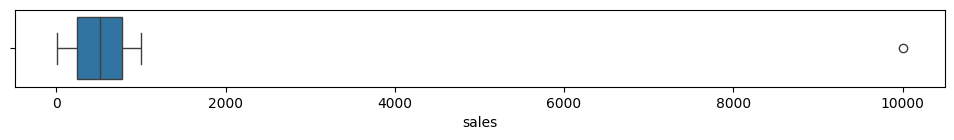

In [44]:
plt.figure(figsize=(12,1))
sns.boxplot(x="sales", data=df)
plt.show()

### Check for outliers (P3)
- Although it is possible that the outlier was a valid sale price, for the context of this project I've decided to remove that record from the dataset
- Filtering out the data so only records with a sales price less than 2000 are included in the dataset

In [46]:
df = df[df['sales']<= 2000]

### Save the DataFrame as a CSV file for the next notebook:

In [48]:
# Save the DataFrame as a CSV file
df.to_csv('cleaned_sales_data.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      997 non-null    datetime64[ns]
 1   category  997 non-null    object        
 2   sales     997 non-null    float64       
 3   region    997 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.9+ KB
